In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
ranges = [(9, 13),     # XLPE/EVA
    (18.957, 19, 357),
    (13.879, 14.103),  # Graphite
    (11.017, 11.068),  # Mica
    (12.226, 12.396),
    (13.426, 13.603),
    (16.484, 16.660),
    (14.393, 14.793),  # NaCl
    (16.663, 17.063),
    (23.733, 24.133),
    (27.933, 28.333),
    (29.213, 29.613),
    (33.950, 34.250),
    (37.043, 37.443),
    (38.048, 38.448),
    (41.940, 42.200),
    (44.630, 44.859),
    (14.993, 15.173),  # KCl
    (21.303, 21.484),
    (25.169, 25.324),
    (26.124, 26.472),
    (15.522, 15.803),  # CaCO3
    (19.054, 19.154),
    (20.720, 20.948),
    (22.690, 22.815),
    (24.650, 24.812),
    (25.328, 25.596),
    (29.687, 29.917),
    (31.276, 31.910),
    (33.147, 33.501),
    (33.753, 33.946),
    (19.154, 19.368),  # ZnO
    (18.193, 18.464),
    (24.873, 25.117),
    (32.292, 32.617),
    (34.783, 35.007),
    (35.227, 35.568),
    (38.717, 39.275),
    (44.330, 44.574),
    (14.45, 14.70),    #Unknowns
    (28.3, 28.5),
    (26.55, 26.85),
    (13, 13.2),
    (17.75, 17.95),
    (18.3, 18.7),
    (24.26, 24.80),
    (28.9, 29.10)
              ]

In [3]:
from beavermap import BeaverMap
import os 
bm = BeaverMap(
    #h5_file = './data/al2o3_m330p0/al2o3_m330p0.h5',
    h5_file = '/Users/badw/Desktop/sofie/Mount3/mount2_b_t69_hv_00_00/mount2_b_t69_hv_00_00.h5',
    poni_file = './data/m330p0.poni',
    mask_file = './data/mask.edf',
    chunk_size = 100,
    location = '1.1/measurement/eiger',
    nworkers = 1,
)
bm.default_integrate_args
bm.chunks

array([[    0,     1,     2, ...,    97,    98,    99],
       [  100,   101,   102, ...,   197,   198,   199],
       [  200,   201,   202, ...,   297,   298,   299],
       ...,
       [22200, 22201, 22202, ..., 22297, 22298, 22299],
       [22300, 22301, 22302, ..., 22397, 22398, 22399],
       [22400, 22401, 22402, ..., 22497, 22498, 22499]])

In [5]:
max_sum = bm.max_sum(ncpus=8,tqdm_kwargs={'ncols':None})

performing max summation:   0%|          | 0/225 [00:00<?, ?it/s]

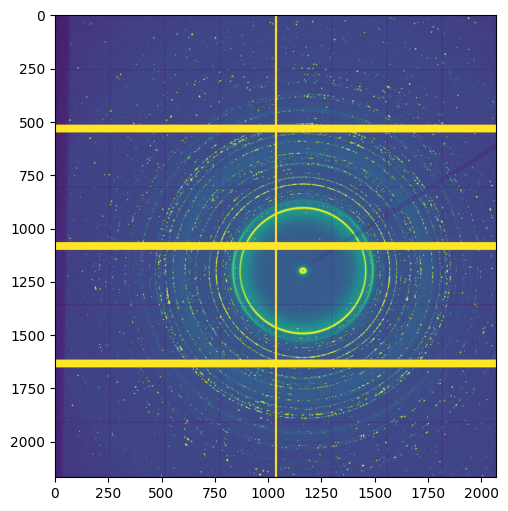

In [6]:
import matplotlib.pyplot as plt 
import numpy as np 

fig,ax = plt.subplots(figsize=(6,6),dpi=100)

ax.imshow(max_sum,vmin=0,vmax=np.median(max_sum)*5)

In [75]:
mapping = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

empty = np.zeros(np.array(mapping).shape)

mapping

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [85]:
test_dict = {'test':1}

if 'no' in test_dict:
    print('yes')

In [76]:
pos = np.where(mapping==1)
empty[pos] = 1

In [ ]:
from beavermap import BeaverMap 
from typing import Union, Optional
import numpy as np 

class BeaverMapPlotter:
    def __init__(
            self,
            BeaverMap:Union[list,dict,str,BeaverMap],
            mapping: Union[np.ndarray,list]
            ):
        """
        need to add list of dicts
        """
        
        self.mapping = np.array(mapping)

        if isinstance(BeaverMap,list):
            if not isinstance(BeaverMap[0],dict):
                if not isinstance(BeaverMap[0],str):
                    #list of beavermap objects that is not a path or dict
                    self.max_sum_arr = np.zeros(self.mapping.shape).tolist()
                    self.integrate_arr = np.zeros(self.mapping.shape).tolist()
                    self.metadata_arr = np.zeros(self.mapping.shape).tolist()
                    for i,item in enumerate(BeaverMap):
                        pos = np.where(self.mapping==i)
                        if hasattr(item, 'max_sum_results'):
                            if len(pos) == 2:
                                self.max_sum_arr[pos[0][0]][pos[1][0]] = item.max_sum_results
                            else:
                                self.max_sum_arr[pos[0][0]] = item.max_sum_results
                        if hasattr(item,'integrate_results'):
                            if len(pos) == 2:
                                self.integrate_arr[pos[0][0]][pos[1][0]] = item.integrate_results
                                self.metadata_arr[pos[0][0]][pos[1][0]] = item.__dict__
                            else:
                                self.integrate_arr[pos[0][0]] = item.integrate_results
                                self.metadata_arr[pos[0][0]] = item.__dict__
                else:
                    #list of beavermap strings (paths to .npz files) that is not a Beavermap object or dict
                    self.max_sum_arr = None #np.zeros(self.mapping.shape).tolist() # currently not doing max_sum_arr for these files
                    self.integrate_arr = np.zeros(self.mapping.shape).tolist()
                    self.metadata_arr = np.zeros(self.mapping.shape).tolist()
                    for i,item in enumerate(BeaverMap):
                        pos = np.where(self.mapping==i)
                        data = np.load(item,allow_pickle=True)
                        _arr = data['features']
                        _metadata = data['metadata'].item()
                        if len(pos) == 2:
                            self.integrate_arr[pos[0][0]][pos[1][0]] = _arr
                            self.metadata_arr[pos[0][0]][pos[1][0]] = _metadata
                        else:
                            self.integrate_arr[pos[0][0]] = _arr
                            self.metadata_arr[pos[0][0]] = _metadata

        elif isinstance(BeaverMap,dict):
            if 'max_sum_results' in BeaverMap:
                self.max_sum_arr = [BeaverMap['max_sum_results']]
            if 'integrate_results' in BeaverMap:
                self.integrate_arr = [BeaverMap['integrate_results']]
            self.metadata_arr = [BeaverMap]

        else:
            if hasattr(BeaverMap, 'max_sum_results'):
                self.max_sum_arr = [BeaverMap.max_sum_results]
            if hasattr(BeaverMap,'integrate_results'):
                self.integrate_arr = [BeaverMap.integrate_results]

            self.metadata_arr = [BeaverMap.__dict__]

    def normalise_data(self,normalise='mean'):
        arr = np.array(self.integrate_arr)

        means = np.array(
            [x[normalise] for x in np.array(self.metadata_arr).flatten()]
            )
        means = means.reshape(self.mapping.shape)
        
        for i,ii in enumerate(arr):
            for j,jj in enumerate(ii):
                for r in range(arr.shape[2]):
                    arr[i][j][r] /= means[i][j]
        return(arr)
    
    def combine_patches(
            self,
            normalise:str = 'mean'
            ):
        if normalise:
            arr = self.normalise_data(normalise=normalise)
        else:
            arr = np.array(self.integrate_arr)
        combined_data = []
        for i in range(arr.shape[2]):
            _arr = arr[:,:,i,:]
            t1 = np.hstack(_arr)
            combined_data.append(np.hstack(t1))
    
        return(np.array(combined_data))


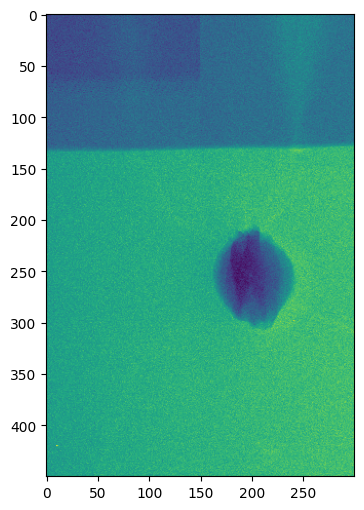

In [ ]:
import glob 

files = sorted(glob.glob('/Users/badw/Desktop/sofie/54_T1_2/*/*.npz'))

mapping = np.array([[0,3],
                    [1,4],
                    [2,5]])

bmp = BeaverMapPlotter(files,mapping)
combined_patches = bmp.combine_patches(normalise='median')

fig,ax = plt.subplots(figsize=(6,6),dpi=100)
ax.imshow(combined_patches[6])

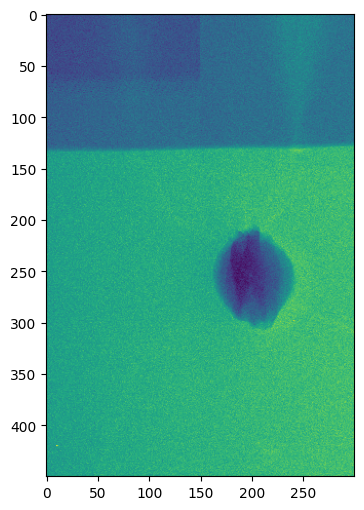

In [777]:
combined_data = []
for i in range(_arr.shape[2]):
    test = _arr[:,:,i,:]
    t1 = np.hstack(test)
    combined_data.append(np.hstack(t1))

test = np.array(combined_data)
test.shape



(47, 450, 300)

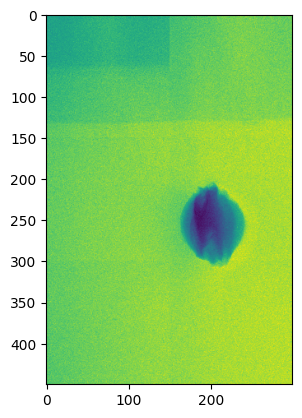

In [780]:
fig,ax = plt.subplots()
ax.imshow(test[3])

In [764]:
_arr[2][0][0]

array([[535.55421436, 536.48966137, 535.55614462, ..., 565.94093996,
        561.9149493 , 559.10387856],
       [538.32698634, 536.75799778, 536.55396712, ..., 561.38448015,
        558.11238149, 562.36027747],
       [533.65691292, 534.8733983 , 531.70937094, ..., 562.07634473,
        560.70300734, 562.55269158],
       ...,
       [531.34159684, 534.2007345 , 530.30056411, ..., 572.6959314 ,
        576.6370953 , 576.85842228],
       [530.41203818, 532.52331972, 533.60616195, ..., 574.17956376,
        576.38559893, 581.51692405],
       [534.96725145, 535.68747231, 533.25147381, ..., 577.45477811,
        577.36207375, 578.74607104]])

In [766]:
test[2][0]

array([[535.55421436, 536.48966137, 535.55614462, ..., 565.94093996,
        561.9149493 , 559.10387856],
       [538.32698634, 536.75799778, 536.55396712, ..., 561.38448015,
        558.11238149, 562.36027747],
       [533.65691292, 534.8733983 , 531.70937094, ..., 562.07634473,
        560.70300734, 562.55269158],
       ...,
       [531.34159684, 534.2007345 , 530.30056411, ..., 572.6959314 ,
        576.6370953 , 576.85842228],
       [530.41203818, 532.52331972, 533.60616195, ..., 574.17956376,
        576.38559893, 581.51692405],
       [534.96725145, 535.68747231, 533.25147381, ..., 577.45477811,
        577.36207375, 578.74607104]])

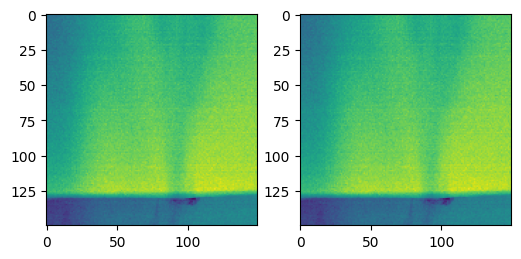

In [767]:
fig,ax = plt.subplots(ncols=2,figsize=(6,6),dpi=100)
ax[0].imshow(_arr[0][1][0])
ax[1].imshow(test[0][1])

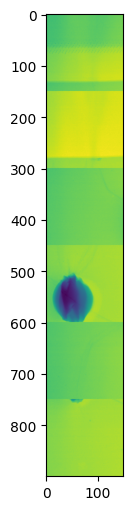

In [ ]:
def combine_patches(chosen_range=0,data=None):
    rejigged_arr_shape = data.shape

    x,y = rejigged_arr_shape[-2:]

    rejigged = data[]


    


In [ ]:
import fabio 
import pyFAI 
import seaborn as sns 
import numpy as np 

directory = '/Users/badw/Documents/ntnu-projects/sofie/from_desktop/data/al2o3_m330p0/'
ai = pyFAI.load('data/m330p0_Ola.poni')
mask = np.array(fabio.open(directory + 'mask.edf').data)
res = ai.integrate1d(_arr, 9000,
                     correctSolidAngle = False,
                     error_model = 'poisson',
                     azimuth_range = None,
                     radial_range = (0,45),
                     polarization_factor = 1,
                     method = 'full',
                     unit = '2th_deg', 
                     normalization_factor = 1,
                     mask = mask) 

sns.set_style('white')
sns.set_palette('pastel')
fig,ax = plt.subplots(figsize=(6,6),dpi=100)
ax.plot(res[0], res[1], label='Data',color='black')
ax.legend(loc='best',edgecolor='black')
ax.set_ylabel('Intensity [-]')
ax.set_xlabel('2$\\theta$')
#ax.set_ylim(0,500)
#ax.set_xlim(11,13.5)
from matplotlib.patches import Rectangle
s = 0.18
for peak in ranges:
    r1 = Rectangle(xy=(peak[0],0),width=peak[1]-peak[0],height=np.max(res),color='red')
    ax.add_patch(r1)

#r2 = Rectangle(xy=(1,0),width=5-1,height=np.max(res))
ax.set_ylim(0,500)
#16.70 17.05 1 5#

In [14]:
bm.__dict__['mask_file']

'./data/mask.edf'

In [61]:
import numpy as np 
from beavermap import BeaverMap
import pyFAI 
import fabio
from scipy.signal import find_peaks


class BeaverMapPeakFinder:

    def __init__(self,BeaverMap):
        self.max_sum = BeaverMap.max_sum_results
        self.metadata = BeaverMap.__dict__

        try:
            self.mask_data = np.array(fabio.open(self.metadata['mask_file']).data)
        except Exception as e:
            raise RuntimeError(e)

    def integrate_max_sum(self):
        result = pyFAI.load(self.metadata['poni_file']).integrate1d(
            self.max_sum,
            mask = self.mask_data,
            **self.metadata['integrate_args']) 
        
        return(result)
    
    def peak_finder(self,integrated_data,**scipy_kwargs):
        if integrated_data is None:
            integrated_data = self.integrate_max_sum()

        peaks = find_peaks(integrated_data[1],**scipy_kwargs)

        return(integrated_data[0][peaks[0]])

        
        

    
bmpf = BeaverMapPeakFinder(bm)

res = bmpf.integrate_max_sum()
peaks = bmpf.peak_finder(res,**{'prominence':10})    


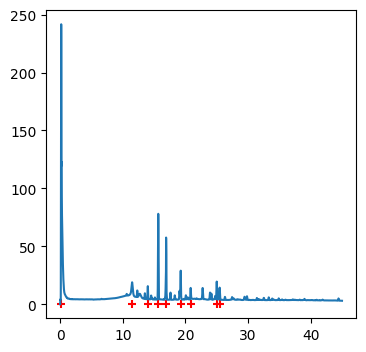

In [62]:
import matplotlib.pyplot as plt 

fig,ax = plt.subplots(figsize=(4,4),dpi=100)
ax.plot(res[0],res[1])
ax.scatter(peaks,[0 for i in peaks],color='red',marker='+')

In [21]:
from scipy.signal import find_peaks
find_peaks(res[1])

(array([   3,   11,   33,   36,   52,  233,  263,  273,  290,  299,  308,
         322,  326,  336,  341,  344,  351,  359,  361,  366,  373,  376,
         388,  391,  401,  411,  416,  423,  437,  446,  452,  459,  475,
         478,  496,  503,  508,  514,  518,  520,  524,  527,  530,  540,
         544,  556,  562,  573,  593,  601,  603,  608,  613,  619,  629,
         642,  645,  653,  655,  657,  673,  676,  681,  692,  698,  704,
         713,  726,  737,  742,  747,  753,  758,  760,  765,  770,  777,
         782,  786,  795,  797,  811,  814,  816,  820,  822,  826,  848,
         855,  862,  881,  886,  892,  902,  907,  914,  918,  925,  929,
         935,  947,  950,  958,  962,  967,  981,  990, 1005, 1014, 1020,
        1024, 1027, 1031, 1044, 1046, 1048, 1058, 1064, 1075, 1078, 1082,
        1086, 1089, 1092, 1102, 1113, 1123, 1132, 1147, 1164, 1168, 1185,
        1189, 1196, 1217, 1224, 1228, 1236, 1239, 1242, 1246, 1259, 1264,
        1275, 1278, 1281, 1284, 1288, 

In [ ]:
integration = bm.integrate(
    ncpus=8, regions=ranges, tqdm_kwargs={"ncols": None})


In [ ]:
import numpy as np 
integration = np.array(integration).sum(axis=0)

In [ ]:
import matplotlib.pyplot as plt 

fig,ax = plt.subplots(figsize=(6,6),dpi=100)

ax.imshow(integration[2],vmin=0,vmax=np.mean(integration[0]))